---
# <center> Лабораторна робота №5 </center>
## __Тема. Алгоритми пошуку__
## __Мета:__ Засвоїти варіанти реалізації алгоритмів пошуку засобами Python і 
методи оцінювання їх складності
---

# <center> Хід роботи </center>

## 1) Оцінити асимптотичну складність алгоритму лінійного пошуку в О-нотації.


In [13]:
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i  
    return -1  


arr = [3, 5, 7, 9, 11, 13]
target = 9

result = linear_search(arr, target)

if result != -1:
    print(f"Елемент знайдений на індексі {result}")
else:
    print("Елемент не знайдений")



Елемент знайдений на індексі 3


### Оцінка асимптотичної складності алгоритму лінійного пошуку

Асимптотична складність алгоритму лінійного пошуку виглядає наступним чином:

- **Найгірший випадок**: $O(n)$, коли шуканий елемент знаходиться в кінці масиву або його взагалі немає. В такому випадку необхідно перевірити кожен елемент.
- **Найкращий випадок**: $O(1)$, якщо елемент знаходиться на першій позиції.
- **Середній випадок**: $O(n)$, оскільки в середньому потрібно перевірити близько половини елементів.


## 2) Oцінити асимптотичну складність алгоритму бінарного пошуку в О-нотації.

In [4]:
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    
    while left <= right:
        mid = (left + right) // 2 
        
        if arr[mid] == target:
            return mid  
        elif arr[mid] < target:
            left = mid + 1  
        else:
            right = mid - 1  
    
    return -1  

arr = [2, 3, 35, 37, 19, 55, 13]
target = 55

result = binary_search(arr, target)

if result != -1:
    print(f"Елемент знайдений на індексі {result}")
else:
    print("Елемент не знайдений")


Елемент знайдений на індексі 5


### Оцінка асимптотичної складності алгоритму бінарного пошуку

Алгоритм бінарного пошуку працює за принципом поділу масиву навпіл, що дозволяє значно зменшити кількість перевірок. Ось як оцінюється асимптотична складність:

- **Найгірший випадок**: $O(\log n)$ — кожного разу масив ділиться навпіл, тому кількість операцій зменшується вдвічі з кожною ітерацією. Таким чином, складність росте логарифмічно.
- **Найкращий випадок**: $O(1)$ — якщо елемент знаходиться в середині масиву, алгоритм одразу його знаходить.
- **Середній випадок**: $O(\log n)$ — у середньому кількість перевірок також буде логарифмічною, оскільки масив буде постійно ділитися навпіл.


## 3) Написати функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції linear_searh();

In [37]:
import time
import pandas as pd
import random


def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1


def linear_search_time(n_values):
    times = []
    for n in n_values:
        a_list = random.sample(range(1, 10*n), n)  
        start_time = time.time()
        linear_search(a_list, -1)  
        end_time = time.time()
        times.append(end_time - start_time)  
    return pd.DataFrame({'n': n_values, 'time': times})

# Тестування функції
n_values = [300000, 500000, 600000, 800000, 1000000, 12000000]  
linear_df = linear_search_time(n_values)
print(linear_df)


          n      time
0    300000  0.016952
1    500000  0.031916
2    600000  0.036533
3    800000  0.047900
4   1000000  0.061051
5  12000000  0.688030


## 4) − написати функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції bin_searh()

In [38]:
def bin_search(a_list, x, left, right):
    if left > right:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif a_list[middle] < x:
        return bin_search(a_list, x, middle + 1, right)
    else:
        return bin_search(a_list, x, left, middle - 1)


def bin_search_time(n_values):
    times = []
    for n in n_values:
        a_list = sorted(random.sample(range(1, 10*n), n))  
        start_time = time.time()
        bin_search(a_list, -1, 0, len(a_list) - 1)  
        end_time = time.time()
        times.append(end_time - start_time)  
    return pd.DataFrame({'n': n_values, 'time': times})

# Тестування функції
bin_values = [300000, 500000, 600000, 800000, 1000000, 12000000]  
bin_df = bin_search_time(bin_values)
print(bin_df)



          n  time
0    300000   0.0
1    500000   0.0
2    600000   0.0
3    800000   0.0
4   1000000   0.0
5  12000000   0.0


## 5) За результатами попередніх завдань побудувати графіки залежності часу виконання процедури пошуку від розміру масиву.


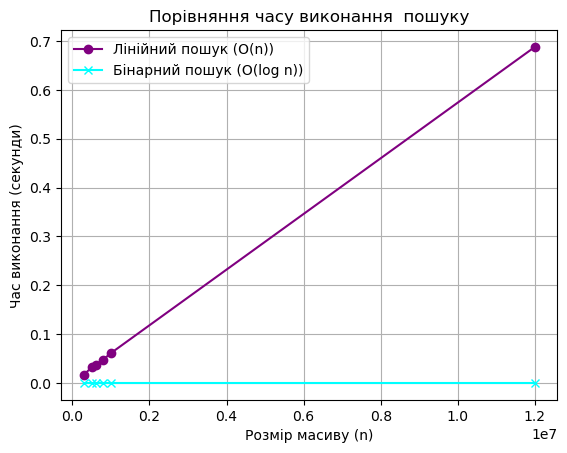

In [42]:
import matplotlib.pyplot as plt

# графіки
def plot_time_comparison(linear_df, bin_df):
    plt.plot(linear_df['n'], linear_df['time'], label='Лінійний пошук (O(n))', marker='o', color='purple')
    plt.plot(bin_df['n'], bin_df['time'], label='Бінарний пошук (O(log n))', marker='x', color='cyan')
    
    plt.xlabel('Розмір масиву (n)')
    plt.ylabel('Час виконання (секунди)')
    plt.title('Порівняння часу виконання  пошуку')
    plt.legend()
    plt.grid(True)
    plt.show()

#функції для графіка
plot_time_comparison(linear_df, bin_df)

## 6) Оцінити, який з двох алгоритмів є ефективнішим і в якому діапазоні розміру задачі.

З графіків, побудованих раніше, можна побачити, що лінійний пошук зростає пропорційно розміру масиву, а бінарний пошук — набагато повільніше. На малих розмірах масивів час виконання обох алгоритмів може бути схожим, але на великих масивах бінарний пошук стане значно ефективнішим

# <center> Контрольні питання </center>

# Сформулювати задачу пошуку

**Задача:**  
Дано масив чисел $A = [a_1, a_2, \dots, a_n]$, де $n$ — розмір масиву. Необхідно знайти індекс елемента $x$, який відповідає умові $A[i] = x$, або повернути $-1$, якщо такий елемент відсутній.

---

### Умови задачі:

1. **Вхідні дані:**
   - Масив $A$, який може бути:
     - **Необов'язково відсортованим** (підходить для лінійного пошуку).
     - **Відсортованим за зростанням** (підходить для бінарного пошуку).
   - Шуканий елемент $x$, який потрібно знайти в масиві.

2. **Вихідні дані:**
   - Індекс елемента $x$ у масиві $A$, якщо він присутній.
   - Значення $-1$, якщо елемент $x$ у масиві відсутній.

3. **Обмеження:**
   - $n > 0$ — масив не може бути порожнім.
   - Масив може містити повторювані елементи, але алгоритми завжди повертають індекс першого знайденого елемента.


# Які критерії можна використовувати для оцінювання ефективності алгоритмів пошуку?

## 1. **Часова складність**
   - Визначає, як змінюється час роботи алгоритму залежно від розміру вхідних даних $n$.
   - Основні категорії асимптотичної складності:
     - **Лінійний пошук**: $O(n)$ — час виконання збільшується пропорційно до розміру масиву.
     - **Бінарний пошук**: $O(\\log n)$ — час виконання зростає логарифмічно зі збільшенням розміру масиву.
   - Розглядаються три основні сценарії:
     - **Найгірший випадок** — максимальний обсяг роботи.
     - **Середній випадок** — очікувана продуктивність.
     - **Найкращий випадок** — мінімальний обсяг роботи.

---

## 2. **Просторова складність**
   - Оцінює обсяг додаткової пам’яті, яку використовує алгоритм.   - Типова просторова складність для пошукових алгоритмів:     - **Лінійний пошук**: $O(1)$ — не потребує додаткової пам’яті.\n     - **Бінарний пошук**: $O(1)$ — працює без додаткових структур даних.

---

## 3. **Стабільність алгоритму**
   - У випадку повторюваних елементів стабільний алгоритм завжди знаходить перший елемент, що задовольняє умову пошуку.

---

## 4. **Придатність до різних типів даних**
   - **Лінійний пошук** застосовується для **невідсортованих** масивів.   - **Бінарний пошук** вимагає **відсортованих** масивів.

---

## 5. **Простота реалізації**
   - **Лінійний пошук** легко реалізувати та зрозуміти навіть для новачків.   - **Бінарний пошук** складніший, особливо при використанні рекурсії.

---

## 6. **Швидкість виконання**
   - Вимірюється на практиці, оцінюючи час виконання алгоритму для масивів різного розміру.

---

## 7. **Гнучкість**
   - Оцінює можливість застосування алгоритму до різних структур даних:     - **Лінійний пошук** підходить для списків і потоків даних.     - **Бінарний пошук** потребує структур даних із можливістю сортування.


#  Що таке лінійний пошук і яка його асимптотична складність?

## Що таке лінійний пошук?
**Лінійний пошук** — це простий алгоритм, який проходить через усі елементи масиву послідовно, доки не знайде потрібний елемент або не завершить перегляд.

---

## Як працює алгоритм?

1. Розпочати з першого елемента масиву.
2. Порівнювати поточний елемент із шуканим значенням $x$.
3. Якщо знайдено збіг, повернути індекс елемента.
4. Якщо після перевірки всіх елементів шуканий елемент не знайдено, повернути $-1$.

---

## Приклад роботи
Розглянемо масив $A = [5, 3, 8, 6]$ і шуканий елемент $x = 8$:
- Починаємо перевірку з першого елемента:
  - $5 \\neq 8$ — переходимо до наступного.
  - $3 \\neq 8$ — продовжуємо перевірку.
  - $8 = 8$ — елемент знайдено, повертаємо індекс (2).

---

## Аналіз складності

### 1. Часова складність:
- **Найкращий випадок:** $O(1)$ — елемент знайдено одразу.
- **Середній випадок:** $O(n/2) \\approx O(n)$ — перевіряється приблизно половина елементів.
- **Найгірший випадок:** $O(n)$ — потрібно переглянути всі елементи.

### 2. Просторова складність:
- $O(1)$ — алгоритм не використовує додаткову пам’ять, окрім змінної для індексу.

---

## Переваги та недоліки

### Переваги:
- Легкість у реалізації.
- Працює з невідсортованими масивами.

### Недоліки:
- Неефективний для великих масивів через лінійний характер пошуку.


# Що таке бінарний (двійковий) пошук і в чому полягає його головний принцип роботи?

## Що таке бінарний (двійковий) пошук?
**Бінарний пошук** — це алгоритм, який застосовується до **відсортованих масивів**. Він поступово зменшує діапазон пошуку, розділяючи масив на дві частини на кожному етапі.

---

## Як працює алгоритм?

1. Визначити середній елемент масиву.
2. Порівняти середній елемент із шуканим значенням $x$:
   - Якщо $x$ менше за середній елемент, продовжити пошук у **лівій частині** масиву.
   - Якщо $x$ більше за середній елемент, перейти до **правої частини** масиву.
   - Якщо середній елемент дорівнює $x$, повернути його індекс.
3. Повторювати процес, доки не буде знайдено елемент або діапазон пошуку не стане порожнім.

---

## Часова складність

- **Найкращий випадок:** $O(1)$ — елемент знаходиться одразу.
- **Середній та найгірший випадки:** $O(\log n)$ — кількість кроків зменшується логарифмічно зі збільшенням розміру масиву.

---

## Чому бінарний пошук ефективний?

- Кожен крок зменшує розмір діапазону пошуку вдвічі.
- Ефективний для роботи з великими відсортованими масивами.

---

## Основна перевага
Швидкість виконання: завдяки поділу масиву на половини на кожному кроці бінарний пошук виконується значно швидше, ніж лінійний пошук.


# Порівняння бінарного та лінійного пошуку

## **Переваги бінарного пошуку:**
1. **Швидкість:** Часова складність $O(\log n)$, що значно ефективніше за $O(n)$ лінійного пошуку для великих масивів.
2. **Придатність для великих даних:** Значно швидше знаходить елемент у великих відсортованих масивах.

---

## **Недоліки бінарного пошуку:**
1. **Вимога сортування:** Масив має бути відсортований, що може зайняти $O(n \log n)$ часу.
2. **Складність реалізації:** Бінарний пошук складніший у програмуванні та розумінні для початківців.
3. **Непридатність для динамічних даних:** Не працює на змінних чи несортованих структурах.

---

## **Переваги лінійного пошуку:**
1. **Простота:** Легкий у реалізації та розумінні.
2. **Універсальність:** Працює на несортованих масивах або потоках даних.

---

## **Недоліки лінійного пошуку:**
1. **Повільність:** Часова складність $O(n)$ робить його неефективним для великих масивів.


# Які ще алгоритми пошуку існують, окрім лінійного і бінарного?

## алгоритми пошуку існують:

1. **Індексований пошук**
   - Виконується через індексацію елементів, наприклад, із використанням хеш-таблиць.
   - Час пошуку: $O(1)$ у середньому випадку.

2. **Пошук у дереві**
   - Застосовуються алгоритми для роботи з бінарними деревами пошуку (BST), AVL-деревами, червоно-чорними деревами тощо.
   - Часова складність: $O(\log n)$ для збалансованих дерев.

3. **Пошук із використанням хешування**
   - Застосовуються хеш-таблиці для швидкого доступу до елементів.
   - Часова складність: $O(1)$ у середньому випадку.

4. **Пошук у графах**
   - Використовуються алгоритми:
     - **Пошук у глибину (DFS)**.
     - **Пошук у ширину (BFS)**.
   - Часова складність: $O(V + E)$, де $V$ — кількість вершин, $E$ — кількість ребер.

5. **Пошук у інтервальних деревах**
   - Застосовується для знаходження елементів у діапазонах або відрізках, наприклад, із використанням інтервальних дерев.
   - Часова складність: $O(\log n)$.

6. **Пошук із використанням двійкового дерева відсічень**
   - Використовується для роботи з відсортованими даними, особливо для операцій типу "менше або рівно" чи "більше або рівно".
   - Забезпечує ефективність для великих масивів даних.
